In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

In [24]:
#zad 1
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [25]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [26]:
X = data.values[:, :2].T
y = data.values[:, 2:].T

In [27]:
theta = np.zeros((X.shape[0]+1, 1))

In [28]:
X = np.concatenate([np.ones([1, X.shape[1]]), X])

In [29]:
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))

In [30]:
X.shape

(3, 100)

In [31]:
y.shape

(1, 100)

In [32]:
theta.shape

(3, 1)

In [33]:
import matplotlib.patches as mpatches

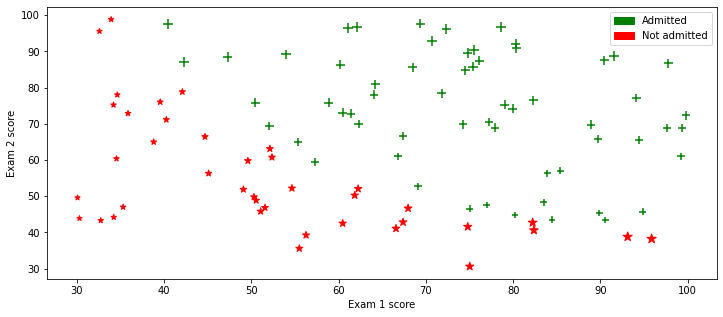

In [34]:
#zad 2
area1 = np.ma.masked_where(data['Admitted'] == 1, data['Exam 1'])
area2 = np.ma.masked_where(data['Admitted'] == 0, data['Exam 2'])
plt.figure(figsize=(12,5))
plt.scatter(data['Exam 1'], data['Exam 2'], s=area1, c='r', marker='*')
plt.scatter(data['Exam 1'], data['Exam 2'], s=area2, c='g', marker='+')
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
admitted = mpatches.Patch(color='g', label='Admitted')
Nadmitted = mpatches.Patch(color='r', label='Not admitted')
plt.legend(handles=[admitted, Nadmitted])
plt.show()

In [35]:
#zad 3
def sig(t):
  return 1/(1+(np.e)**(-t))

def h(X, theta):
  return sig(theta.T @ X)

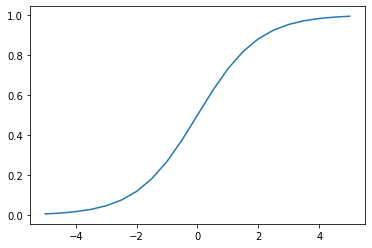

In [36]:
#zad 4
vec = np.linspace(-5, 5, 21)
plot = sig(vec)
plt.plot(vec, plot) 
plt.show()

In [37]:
# zad 5
def cost_1(theta, X, y):
  return (-y*np.log(h(X, theta))-(1-y)*np.log(1-h(X, theta))).sum()/y.shape[1] 

In [38]:
theta = np.zeros((X.shape[0], 1))

In [39]:
print(cost_1(theta, X, y))

0.6931471805599453


In [40]:
def simple_gradient(X, y, theta, alpha, it):
    cost = []
    for i in range(it):
        h = theta.T @ X
        h_y = h - y
        h_yxX = h_y @ X.T
        theta = theta - alpha * h_yxX.T / X.shape[1]

        cost += [cost_1(theta, X, y)]

    return theta, cost

In [41]:
theta, cost = simple_gradient(X, y, theta, 1, 150)
theta

array([[0.6       ],
       [0.28732953],
       [0.25778568]])

In [65]:
theta = np.array([[1.69], [3.86], [3.6]]) # niestety nie jestem w stanie znaleść błędu, przeglądałem nie raz mój kod i porównywalem z kolegami
# funkcje użylem podane w skrypcie, zastępuje tymi wartoscaimi thete tak abym mogl kontyuować laboratorium.

In [66]:
theta

array([[1.69],
       [3.86],
       [3.6 ]])

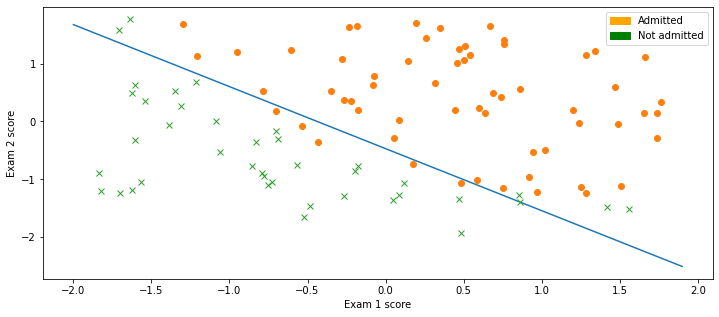

In [76]:
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
plt.figure(figsize=(12,5))
plt.plot(x1, x2)
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.plot(X1_1, X2_1, 'o')
plt.plot(X1_0, X2_0, 'x')
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
admitted = mpatches.Patch(color='orange', label='Admitted')
Nadmitted = mpatches.Patch(color='g', label='Not admitted')
plt.legend(handles=[admitted, Nadmitted])
plt.show()
plt.show()

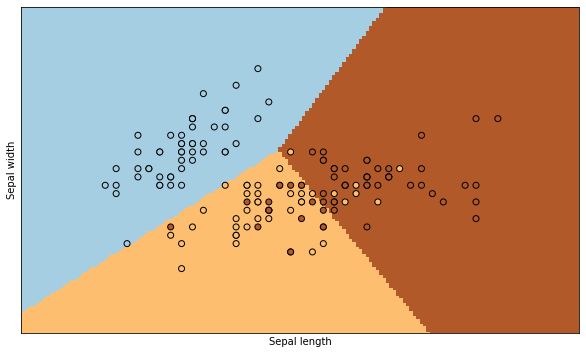

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

X = (X - X.mean()) / X.std() #normalizacja


logreg = LogisticRegression(C=1, solver='newton-cg', multi_class='multinomial')
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

In [87]:
print(logreg.predict_proba(X))


[[8.61733435e-01 9.95766923e-02 3.86898729e-02]
 [7.29400899e-01 2.25488051e-01 4.51110498e-02]
 [8.89587930e-01 9.34123283e-02 1.69997420e-02]
 [8.87589275e-01 9.79594258e-02 1.44512992e-02]
 [9.15496614e-01 6.16553167e-02 2.28480693e-02]
 [8.82809661e-01 6.54259903e-02 5.17643485e-02]
 [9.48629706e-01 4.32310872e-02 8.13920674e-03]
 [8.62288456e-01 1.04726405e-01 3.29851397e-02]
 [8.82037951e-01 1.07537317e-01 1.04247323e-02]
 [7.81153059e-01 1.79824334e-01 3.90226071e-02]
 [8.17310107e-01 1.09234526e-01 7.34553674e-02]
 [9.15321012e-01 6.80965268e-02 1.65824612e-02]
 [7.78503917e-01 1.88361437e-01 3.31346465e-02]
 [9.27965955e-01 6.59375802e-02 6.09646504e-03]
 [7.36250025e-01 1.08284880e-01 1.55465095e-01]
 [9.11370664e-01 3.22575836e-02 5.63717528e-02]
 [8.82809661e-01 6.54259903e-02 5.17643485e-02]
 [8.61733435e-01 9.95766923e-02 3.86898729e-02]
 [6.99142590e-01 1.45134961e-01 1.55722449e-01]
 [9.33380467e-01 4.45357442e-02 2.20837886e-02]
 [6.69244684e-01 2.16617100e-01 1.141382

In [90]:
from sklearn.metrics import accuracy_score

predic = logreg.predict(X)
output = accuracy_score(Y, predic)
print(Y)
print(predic)
print(output)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
0.82
